## Telecom Churn - Hackathon Case Study

In [156]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from datetime import date

In [79]:
data = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)

In [80]:
data

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0          0        109             0.0             0.0             0.0   
1          1        109             0.0             0.0             0.0   
2          2        109             0.0             0.0             0.0   
3          3        109             0.0             0.0             0.0   
4          4        109             0.0             0.0             0.0   
...      ...        ...             ...             ...             ...   
69994  69994        109             0.0             0.0             0.0   
69995  69995        109             0.0             0.0             0.0   
69996  69996        109             0.0             0.0             0.0   
69997  69997        109             0.0             0.0             0.0   
69998  69998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0                6/30/2014            7/31/2014            8/31/2014   31.277   
1                6/30/2014            7/31/2014            8/31/2014    0.000   
2                6/30/2014            7/31/2014            8/31/2014   60.806   
3                6/30/2014            7/31/2014            8/31/2014  156.362   
4                6/30/2014            7/31/2014            8/31/2014  240.708   
...                    ...                  ...                  ...      ...   
69994            6/30/2014            7/31/2014            8/31/2014   15.760   
69995            6/30/2014            7/31/2014            8/31/2014  160.083   
69996            6/30/2014            7/31/2014            8/31/2014  372.088   
69997            6/30/2014            7/31/2014            8/31/2014  238.575   
69998            6/30/2014            7/31/2014            8/31/2014  168.269   

        arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0       87.009    7.527        48.58       124.38         1.29         32.24   
1      122.787   42.953         0.00         0.00         0.00          0.00   
2      103.176    0.000         0.53        15.93         0.00         53.99   
3      205.260  111.095         7.26        16.01         0.00         68.76   
4      128.191  101.565        21.28         4.83         6.13         56.99   
...        ...      ...          ...          ...          ...           ...   
69994  410.924  329.136         0.00         7.36        10.93          0.00   
69995  289.129  265.772       116.54       196.46       232.63         49.53   
69996  258.374  279.782        77.13        68.44        78.44        335.54   
69997  245.414  145.062        14.01         7.64         6.71         30.34   
69998   42.815  167.961         0.00         0.00         0.00          0.00   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0             96.68          2.33           0.00            0.0   
1             25.99         30.89           0.00            0.0   
2             82.05          0.00           0.00            0.0   
3             78.48         50.23           0.00            0.0   
4             38.11          9.63          53.64            0.0   
...             ...           ...            ...            ...   
69994        488.46        381.64          14.96            0.0   
69995         96.28         48.06           0.00            0.0   
69996        227.94        263.84           0.00            0.0   
69997         16.68         12.56          25.06            0.0   
69998          0.00          0.00           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0                0.0           0.00            0.0           0.00   
1                0.0           0.00            0.0           0.00   
2                0.0           0.00            0.0           0.00   
3                0.0           0.00            0.0           1.63   
4                0.0     

In [81]:
# Dropping `id` as being a numerical count for listing purposes only. Dropping circle_id as it represents the network operator Id.
train = data.drop(columns=['id', 'circle_id'], axis=1)
# Popping out churn_probability as the target
y = train.pop('churn_probability')

In [82]:
train

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6  \
0                 0.0             0.0             0.0            6/30/2014   
1                 0.0             0.0             0.0            6/30/2014   
2                 0.0             0.0             0.0            6/30/2014   
3                 0.0             0.0             0.0            6/30/2014   
4                 0.0             0.0             0.0            6/30/2014   
...               ...             ...             ...                  ...   
69994             0.0             0.0             0.0            6/30/2014   
69995             0.0             0.0             0.0            6/30/2014   
69996             0.0             0.0             0.0            6/30/2014   
69997             0.0             0.0             0.0            6/30/2014   
69998             0.0             0.0             0.0            6/30/2014   

      last_date_of_month_7 last_date_of_month_8   arpu_6   arpu_7   arpu_8  \
0                7/31/2014            8/31/2014   31.277   87.009    7.527   
1                7/31/2014            8/31/2014    0.000  122.787   42.953   
2                7/31/2014            8/31/2014   60.806  103.176    0.000   
3                7/31/2014            8/31/2014  156.362  205.260  111.095   
4                7/31/2014            8/31/2014  240.708  128.191  101.565   
...                    ...                  ...      ...      ...      ...   
69994            7/31/2014            8/31/2014   15.760  410.924  329.136   
69995            7/31/2014            8/31/2014  160.083  289.129  265.772   
69996            7/31/2014            8/31/2014  372.088  258.374  279.782   
69997            7/31/2014            8/31/2014  238.575  245.414  145.062   
69998            7/31/2014            8/31/2014  168.269   42.815  167.961   

       onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0            48.58       124.38         1.29         32.24         96.68   
1             0.00         0.00         0.00          0.00         25.99   
2             0.53        15.93         0.00         53.99         82.05   
3             7.26        16.01         0.00         68.76         78.48   
4            21.28         4.83         6.13         56.99         38.11   
...            ...          ...          ...           ...           ...   
69994         0.00         7.36        10.93          0.00        488.46   
69995       116.54       196.46       232.63         49.53         96.28   
69996        77.13        68.44        78.44        335.54        227.94   
69997        14.01         7.64         6.71         30.34         16.68   
69998         0.00         0.00         0.00          0.00          0.00   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0              2.33           0.00            0.0            0.0   
1             30.89           0.00            0.0            0.0   
2              0.00           0.00            0.0            0.0   
3             50.23           0.00            0.0            0.0   
4              9.63          53.64            0.0            0.0   
...             ...            ...            ...            ...   
69994        381.64          14.96            0.0            0.0   
69995         48.06           0.00            0.0            0.0   
69996        263.84           0.00            0.0            0.0   
69997         12.56          25.06            0.0            0.0   
69998          0.00           0.00            0.0            0.0   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0               0.00            0.0           0.00              2.23   
1               0.00            0.0           0.00              0.00   
2               0.00            0.0           0.00              0.53   
3               0.00            0.0           1.63              6.99   
4              15.73            0.0        

In [83]:
train.describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         69297.0         69297.0         69297.0  69999.000000   
mean              0.0             0.0             0.0    283.134365   
std               0.0             0.0             0.0    334.213918   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0     93.581000   
50%               0.0             0.0             0.0    197.484000   
75%               0.0             0.0             0.0    370.791000   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count  69999.000000  69999.000000  67231.000000  67312.000000  66296.000000   
mean     278.185912    278.858826    133.153275    133.894438    132.978257   
std      344.366927    351.924315    299.963093    311.277193    311.896596   
min    -1289.715000   -945.808000      0.000000      0.000000      0.000000   
25%       86.714000     84.095000      7.410000      6.675000      6.410000   
50%      191.588000    192.234000     34.110000     32.280000     32.100000   
75%      365.369500    369.909000    119.390000    115.837500    115.060000   
max    35145.834000  33543.624000   7376.710000   8157.780000  10752.560000   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count  67231.000000  67312.000000  66296.000000   67231.000000   67312.000000   
mean     198.874771    197.153383    196.543577       9.765435       7.014568   
std      316.818355    322.482226    324.089234      57.374429      55.960985   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       34.860000     32.240000     31.575000       0.000000       0.000000   
50%       96.480000     91.885000     91.800000       0.000000       0.000000   
75%      232.990000    227.630000    229.345000       0.000000       0.000000   
max     8362.360000   7043.980000  14007.340000    2850.980000    4155.830000   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   66296.000000   67231.000000   67312.000000   66296.000000   
mean        7.004892      14.186457       9.842191       9.771783   
std        53.408135      73.469261      58.511894      64.618388   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3775.110000    2812.040000    5337.040000   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count      67231.000000      67312.000000      66296.000000      67231.000000   
mean          46.904854         46.166503         45.686109         93.238231   
std          150.971758        154.739002        153.716880        162.046699   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.660000          1.650000          1.610000          9.920000   
50%           11.910000         11.580000         11.740000         41.030000   
75%           40.740000         39.760000         39.895000        110.430000   
max         6431.330000       7400.660000      10752.560000       4696.830000   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count      67312.000000      66296.000000      67231.000000      67312.000000   
mean          90.799240         91.121447          3.743179          3.777031   
std          153.852597        152.997805         13.319542         13.568110   
min            0.000000          0.000000          0.000000          0.000000   
25%           10.090000          9.830000          0.000000          0.000000   
50%           40.170000         40.350000          0.000000          0.000000   
75%   

In [84]:
y.value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

Dropping columns with unique values

In [85]:
for col in train:
    if train[col].nunique() == 1:
        del train[col]
train

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0       31.277   87.009    7.527        48.58       124.38         1.29   
1        0.000  122.787   42.953         0.00         0.00         0.00   
2       60.806  103.176    0.000         0.53        15.93         0.00   
3      156.362  205.260  111.095         7.26        16.01         0.00   
4      240.708  128.191  101.565        21.28         4.83         6.13   
...        ...      ...      ...          ...          ...          ...   
69994   15.760  410.924  329.136         0.00         7.36        10.93   
69995  160.083  289.129  265.772       116.54       196.46       232.63   
69996  372.088  258.374  279.782        77.13        68.44        78.44   
69997  238.575  245.414  145.062        14.01         7.64         6.71   
69998  168.269   42.815  167.961         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0             32.24         96.68          2.33           0.00            0.0   
1              0.00         25.99         30.89           0.00            0.0   
2             53.99         82.05          0.00           0.00            0.0   
3             68.76         78.48         50.23           0.00            0.0   
4             56.99         38.11          9.63          53.64            0.0   
...             ...           ...           ...            ...            ...   
69994          0.00        488.46        381.64          14.96            0.0   
69995         49.53         96.28         48.06           0.00            0.0   
69996        335.54        227.94        263.84           0.00            0.0   
69997         30.34         16.68         12.56          25.06            0.0   
69998          0.00          0.00          0.00           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0                0.0           0.00            0.0           0.00   
1                0.0           0.00            0.0           0.00   
2                0.0           0.00            0.0           0.00   
3                0.0           0.00            0.0           1.63   
4                0.0          15.73            0.0           0.00   
...              ...            ...            ...            ...   
69994            0.0           0.00            0.0           0.00   
69995            0.0           0.00            0.0           0.00   
69996            0.0           0.00            0.0           0.00   
69997            0.0           4.58            0.0           0.00   
69998            0.0           0.00            0.0           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                  2.23              0.00              0.28              5.29   
1                  0.00              0.00              0.00              0.00   
2                  0.53             12.98              0.00             24.11   
3                  6.99              3.94              0.00             37.91   
4                 10.16              4.83              6.13             36.74   
...                 ...               ...               ...               ...   
69994              0.00              2.44              7.19              0.00   
69995              7.18             30.11              9.06             37.53   
69996             77.13             44.28             78.44            143.19   
69997             10.88              7.64              6.71              4.44   
69998              0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                 16.04              2.33              0.00              0.00   
1                  0.00              0.00              0.00              0.00   
2                  0.00              0.00              0.00              0.00   
3       

Handling missing values

In [86]:
train.isna().sum().sum()

1813532

In [87]:
for col in train:
    if train[col].dtype == 'float':
        train[col] = train[col].fillna(0)
    if train[col].dtype == 'int':
        train[col] = train[col].fillna(0)
train.isna().sum().sum()

160943

In [88]:
churn_categorical = train.select_dtypes(include=['object'])
churn_categorical.isna().sum().sum()

160943

In [89]:
for col in churn_categorical:
    print(churn_categorical[col].name, 'has', churn_categorical[col].isna().sum(), 'null entries')
print('')
print('Total null entries in the train data set of', data.isna().sum().sum(), 'are only present in the categorical columns (', churn_categorical.isna().sum().sum(),')')

date_of_last_rech_6 has 1101 null entries
date_of_last_rech_7 has 1234 null entries
date_of_last_rech_8 has 2461 null entries
date_of_last_rech_data_6 has 52431 null entries
date_of_last_rech_data_7 has 52134 null entries
date_of_last_rech_data_8 has 51582 null entries

Total null entries in the train data set of 1835086 are only present in the categorical columns ( 160943 )


In [90]:
#for col in churn_categorical:
#    churn_categorical[col] = churn_categorical[col].fillna(date.today().strftime('%m/%d/%Y'))
#    if churn_categorical[col].any != 0:
#        churn_categorical[col] = churn_categorical[col].dt.day
#    else:
#        churn_categorical[col] = churn_categorical[col].replace(regex=['NaN'], value=['0'])
#churn_categorical


##### we can drop those categorical variables for the reasons below:
- The null entries in `last_rech_data` in months 6, 7 and 8 are close to each other, meaning that it's not a reason for churn.
- The null entries in `last_rech` of minutes has almost doubled in month 8, meaning that clients tend to avoid recharging upon churn.

In [91]:
train = train.drop(churn_categorical, axis=1)
train.isna().sum().sum()

0

In [92]:
train

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0       31.277   87.009    7.527        48.58       124.38         1.29   
1        0.000  122.787   42.953         0.00         0.00         0.00   
2       60.806  103.176    0.000         0.53        15.93         0.00   
3      156.362  205.260  111.095         7.26        16.01         0.00   
4      240.708  128.191  101.565        21.28         4.83         6.13   
...        ...      ...      ...          ...          ...          ...   
69994   15.760  410.924  329.136         0.00         7.36        10.93   
69995  160.083  289.129  265.772       116.54       196.46       232.63   
69996  372.088  258.374  279.782        77.13        68.44        78.44   
69997  238.575  245.414  145.062        14.01         7.64         6.71   
69998  168.269   42.815  167.961         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0             32.24         96.68          2.33           0.00            0.0   
1              0.00         25.99         30.89           0.00            0.0   
2             53.99         82.05          0.00           0.00            0.0   
3             68.76         78.48         50.23           0.00            0.0   
4             56.99         38.11          9.63          53.64            0.0   
...             ...           ...           ...            ...            ...   
69994          0.00        488.46        381.64          14.96            0.0   
69995         49.53         96.28         48.06           0.00            0.0   
69996        335.54        227.94        263.84           0.00            0.0   
69997         30.34         16.68         12.56          25.06            0.0   
69998          0.00          0.00          0.00           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0                0.0           0.00            0.0           0.00   
1                0.0           0.00            0.0           0.00   
2                0.0           0.00            0.0           0.00   
3                0.0           0.00            0.0           1.63   
4                0.0          15.73            0.0           0.00   
...              ...            ...            ...            ...   
69994            0.0           0.00            0.0           0.00   
69995            0.0           0.00            0.0           0.00   
69996            0.0           0.00            0.0           0.00   
69997            0.0           4.58            0.0           0.00   
69998            0.0           0.00            0.0           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                  2.23              0.00              0.28              5.29   
1                  0.00              0.00              0.00              0.00   
2                  0.53             12.98              0.00             24.11   
3                  6.99              3.94              0.00             37.91   
4                 10.16              4.83              6.13             36.74   
...                 ...               ...               ...               ...   
69994              0.00              2.44              7.19              0.00   
69995              7.18             30.11              9.06             37.53   
69996             77.13             44.28             78.44            143.19   
69997             10.88              7.64              6.71              4.44   
69998              0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                 16.04              2.33              0.00              0.00   
1                  0.00              0.00              0.00              0.00   
2                  0.00              0.00              0.00              0.00   
3       

In [93]:
# Creating a dataset for columns with Totals related to June (jun_vbc_3g to be included)
month6 = train[train.columns[train.columns.str.contains('|'.join(['6','jun']))] & train.columns[train.columns.str.contains('total')]]
# Creating a dataset for columns with Totals related to July (jul_vbc_3g to be included)
month7 = train[train.columns[train.columns.str.contains('|'.join(['7','jul']))] & train.columns[train.columns.str.contains('total')]]
# Creating a dataset for columns with Totals related to August (aug_vbc_3g to be included)
month8 = train[train.columns[train.columns.str.contains('|'.join(['8','aug']))] & train.columns[train.columns.str.contains('total')]]
# Creating a dataset for all data related to outgoing calls
og = train[train.columns[train.columns.str.contains('og')]]
# Creating a dataset for all data related to incoming calls
ic = train[train.columns[train.columns.str.contains('ic')]]
# Concatinating all totals together to understand correlation
totals = pd.concat([month6, month7, month8], axis=1)

In [94]:
totals

total_og_mou_6  total_ic_mou_6  total_rech_num_6  total_rech_amt_6  \
0               81.21           11.84                 3                77   
1                0.00            3.44                 3                 0   
2               56.49          124.29                 2                70   
3               76.03           95.11                 2               160   
4               63.26           21.54                13               290   
...               ...             ...               ...               ...   
69994            0.00            0.00                 1                50   
69995          166.21           80.24                 5               200   
69996          412.68          542.18                 3               626   
69997           39.78           18.83                 5               379   
69998            0.00            8.13                 2               198   

       total_rech_data_6  total_og_mou_7  total_ic_mou_7  total_rech_num_7  \
0                    0.0          221.68           53.04                 2   
1                    0.0           30.73           39.44                 4   
2                    0.0           99.36           33.83                 4   
3                    0.0           95.98           50.18                 4   
4                    7.0           42.94            9.36                10   
...                  ...             ...             ...               ...   
69994                0.0          496.68          221.99                17   
69995                0.0          292.74          112.43                11   
69996                0.0          296.39          416.58                 1   
69997                1.0           24.33           16.24                 3   
69998                1.0            0.00           65.09                 2   

       total_rech_amt_7  total_rech_data_7  total_og_mou_8  total_ic_mou_8  \
0                    65                0.0            3.63           40.56   
1                   145                1.0           31.66           25.04   
2                   120                0.0            0.00           36.64   
3                   240                0.0           53.84           83.84   
4                   136                7.0           15.76           28.31   
...                 ...                ...             ...             ...   
69994               397                7.0          392.58          269.56   
69995               313                0.0          280.69          136.01   
69996               250                0.0          342.29          414.54   
69997               252                1.0           19.28           17.76   
69998                50                0.0            0.00           33.58   

       total_rech_num_8  total_rech_amt_8  total_rech_data_8  
0                     2                10                0.0  
1                     5                50                0.0  
2                     2                 0                0.0  
3                     3               130                0.0  
4                     8               122                6.0  
...                 ...               ...                ...  
69994                13               512                1.0  
69995                 9               308                0.0  
69996                 4               397                0.0  
69997                 2               145                1.0  
69998                 2               198                1.0  

[69999 rows x 15 columns]

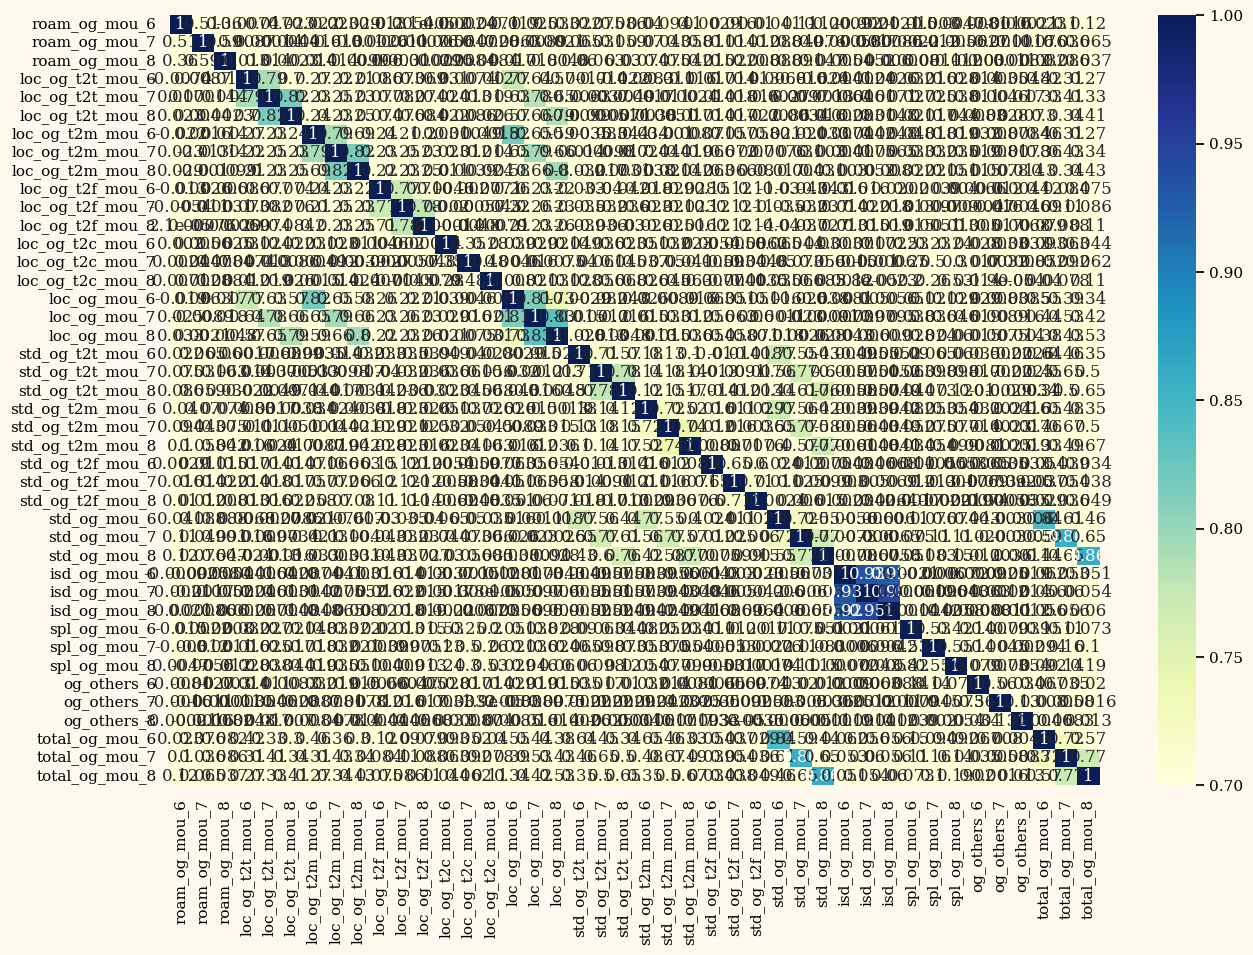

In [95]:
plt.figure(figsize=(15,10))

# heatmap
sns.heatmap(og.corr(), cmap="YlGnBu", annot=True, vmin=0.7)
plt.show()

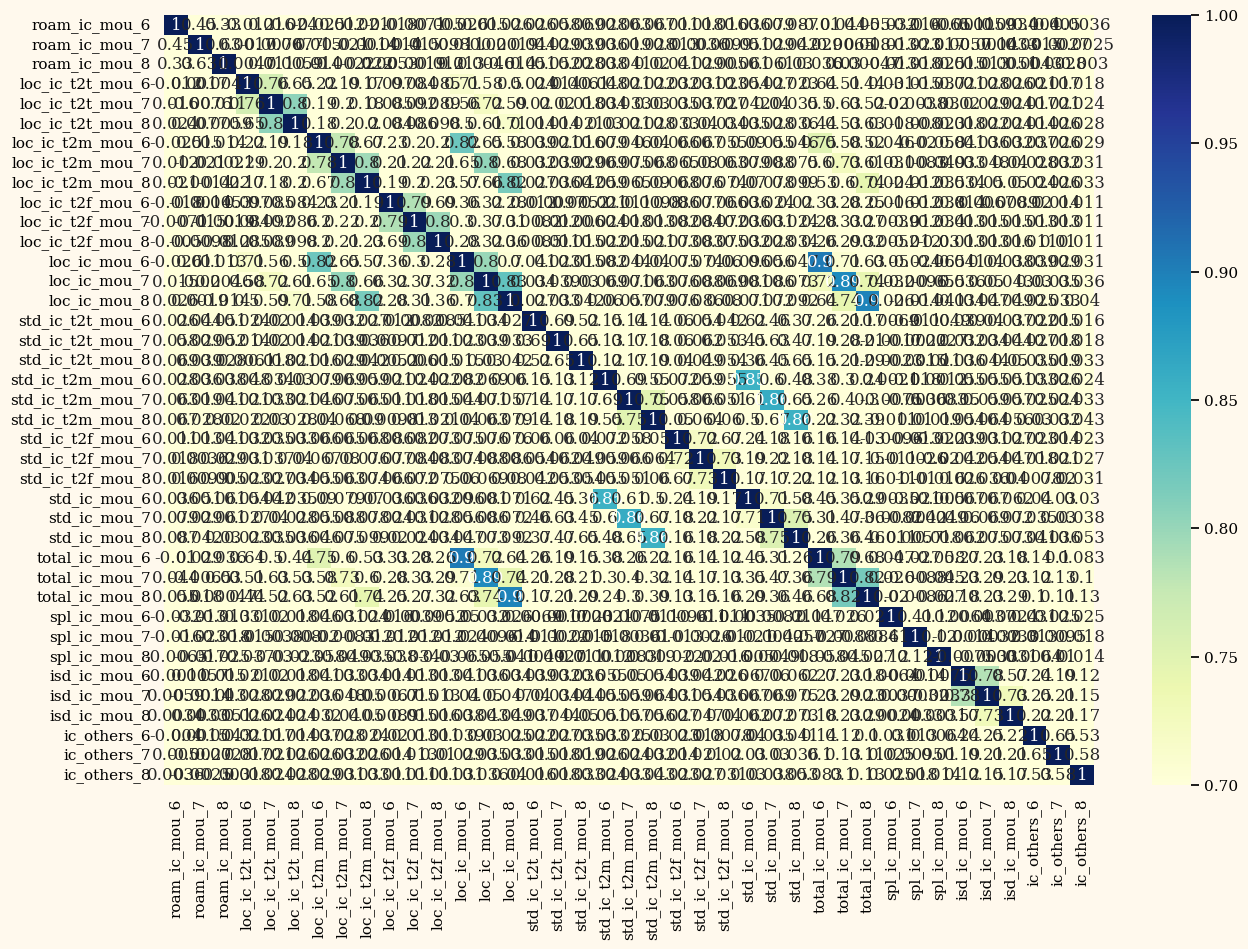

In [96]:
plt.figure(figsize=(15,10))

# heatmap
sns.heatmap(ic.corr(), cmap="YlGnBu", annot=True, vmin=0.7)
plt.show()

Lots of correlations in several variables across months 6, 7 and 8, so we'll drop variables with correlation higher than 90%.

In [97]:
# Create correlation matrix
corr_matrix =train.corr(numeric_only=True).abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [98]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print(to_drop)

['isd_og_mou_7', 'isd_og_mou_8', 'total_ic_mou_6', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']


In [99]:
train = train.drop(to_drop, axis=1)
train

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0       31.277   87.009    7.527        48.58       124.38         1.29   
1        0.000  122.787   42.953         0.00         0.00         0.00   
2       60.806  103.176    0.000         0.53        15.93         0.00   
3      156.362  205.260  111.095         7.26        16.01         0.00   
4      240.708  128.191  101.565        21.28         4.83         6.13   
...        ...      ...      ...          ...          ...          ...   
69994   15.760  410.924  329.136         0.00         7.36        10.93   
69995  160.083  289.129  265.772       116.54       196.46       232.63   
69996  372.088  258.374  279.782        77.13        68.44        78.44   
69997  238.575  245.414  145.062        14.01         7.64         6.71   
69998  168.269   42.815  167.961         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0             32.24         96.68          2.33           0.00            0.0   
1              0.00         25.99         30.89           0.00            0.0   
2             53.99         82.05          0.00           0.00            0.0   
3             68.76         78.48         50.23           0.00            0.0   
4             56.99         38.11          9.63          53.64            0.0   
...             ...           ...           ...            ...            ...   
69994          0.00        488.46        381.64          14.96            0.0   
69995         49.53         96.28         48.06           0.00            0.0   
69996        335.54        227.94        263.84           0.00            0.0   
69997         30.34         16.68         12.56          25.06            0.0   
69998          0.00          0.00          0.00           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0                0.0           0.00            0.0           0.00   
1                0.0           0.00            0.0           0.00   
2                0.0           0.00            0.0           0.00   
3                0.0           0.00            0.0           1.63   
4                0.0          15.73            0.0           0.00   
...              ...            ...            ...            ...   
69994            0.0           0.00            0.0           0.00   
69995            0.0           0.00            0.0           0.00   
69996            0.0           0.00            0.0           0.00   
69997            0.0           4.58            0.0           0.00   
69998            0.0           0.00            0.0           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                  2.23              0.00              0.28              5.29   
1                  0.00              0.00              0.00              0.00   
2                  0.53             12.98              0.00             24.11   
3                  6.99              3.94              0.00             37.91   
4                 10.16              4.83              6.13             36.74   
...                 ...               ...               ...               ...   
69994              0.00              2.44              7.19              0.00   
69995              7.18             30.11              9.06             37.53   
69996             77.13             44.28             78.44            143.19   
69997             10.88              7.64              6.71              4.44   
69998              0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                 16.04              2.33              0.00              0.00   
1                  0.00              0.00              0.00              0.00   
2                  0.00              0.00              0.00              0.00   
3       

Scaling the data

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [101]:
x = scaler.fit_transform(train)

In [102]:
x.shape

(69999, 136)

### Applying PCA on the data

In [103]:
from sklearn.decomposition import PCA

In [104]:
pca1 = PCA(random_state=42)

In [105]:
olddata = pca1.fit(x)

In [106]:
pca1.components_

array([[ 1.56376484e-01,  1.66270469e-01,  1.58051899e-01, ...,
         1.19856609e-01,  1.23023209e-01,  1.16854406e-01],
       [-8.63165946e-02, -9.35469871e-02, -8.51613770e-02, ...,
         1.03340742e-01,  1.07979864e-01,  1.03938058e-01],
       [-5.15485146e-02, -6.58174741e-02, -5.70185451e-02, ...,
        -1.49518678e-02, -1.69912603e-02, -1.59318835e-02],
       ...,
       [-4.12399738e-16,  2.11498676e-16, -3.53853087e-17, ...,
         9.76027118e-17, -4.06571151e-17, -1.37998941e-17],
       [-0.00000000e+00, -1.75189169e-16, -2.96136328e-17, ...,
         3.83175908e-18,  1.18971876e-16, -6.77856788e-18],
       [-0.00000000e+00,  1.45184435e-16, -3.19511771e-16, ...,
        -9.88182185e-17,  4.66078128e-17, -3.70839556e-17]])

In [107]:
pca1.explained_variance_ratio_

array([1.20557107e-01, 9.42308354e-02, 6.47660032e-02, 4.08931757e-02,
       3.67135444e-02, 2.93307883e-02, 2.88032180e-02, 2.58434180e-02,
       2.30075572e-02, 2.23227377e-02, 2.11069069e-02, 2.05112926e-02,
       2.01863694e-02, 1.85686281e-02, 1.62923719e-02, 1.59167360e-02,
       1.44451372e-02, 1.35661452e-02, 1.29082435e-02, 1.27410783e-02,
       1.24161353e-02, 1.20786392e-02, 1.16882938e-02, 1.16596872e-02,
       1.13024772e-02, 1.07142150e-02, 1.05844993e-02, 8.75226060e-03,
       8.28679086e-03, 8.01314102e-03, 7.86030243e-03, 7.66651126e-03,
       7.33265555e-03, 7.23662775e-03, 7.00302626e-03, 6.82135059e-03,
       6.75595561e-03, 6.51580688e-03, 6.48540642e-03, 6.26731732e-03,
       6.13190620e-03, 5.94434062e-03, 5.90643217e-03, 5.86344507e-03,
       5.25171653e-03, 5.23301584e-03, 4.98906285e-03, 4.88253255e-03,
       4.77428581e-03, 4.39830121e-03, 4.22065467e-03, 4.07085604e-03,
       3.94666530e-03, 3.70516976e-03, 3.57722124e-03, 3.51326331e-03,
      

In [108]:
import matplotlib.pyplot as plt

<BarContainer object of 136 artists>

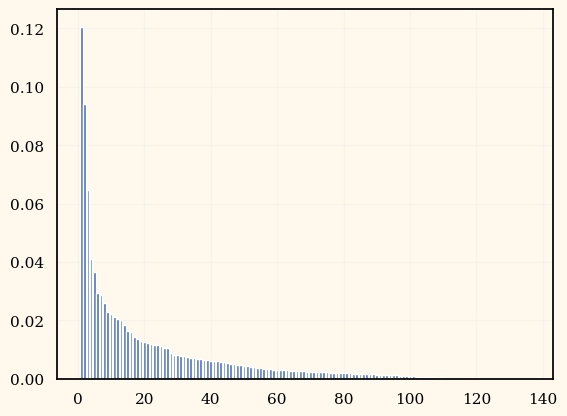

In [109]:
plt.bar(range(1,len(pca1.explained_variance_ratio_)+1), pca1.explained_variance_ratio_)

In [110]:
var_cumu = np.cumsum(pca1.explained_variance_ratio_)

#### Making the scree plot

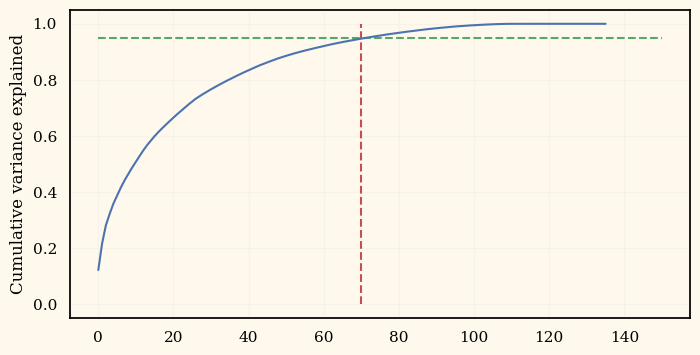

In [111]:
fig = plt.figure(figsize=[8,4])
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

PCA with 71 components

In [112]:
from sklearn.decomposition import IncrementalPCA
pca2 = IncrementalPCA(n_components=71)

In [113]:
newdata = pca2.fit_transform(x)

In [114]:
newdata.shape

(69999, 71)

In [115]:
corrmat = np.corrcoef(newdata.transpose())

In [116]:
corrmat.shape

(71, 71)

<AxesSubplot:>

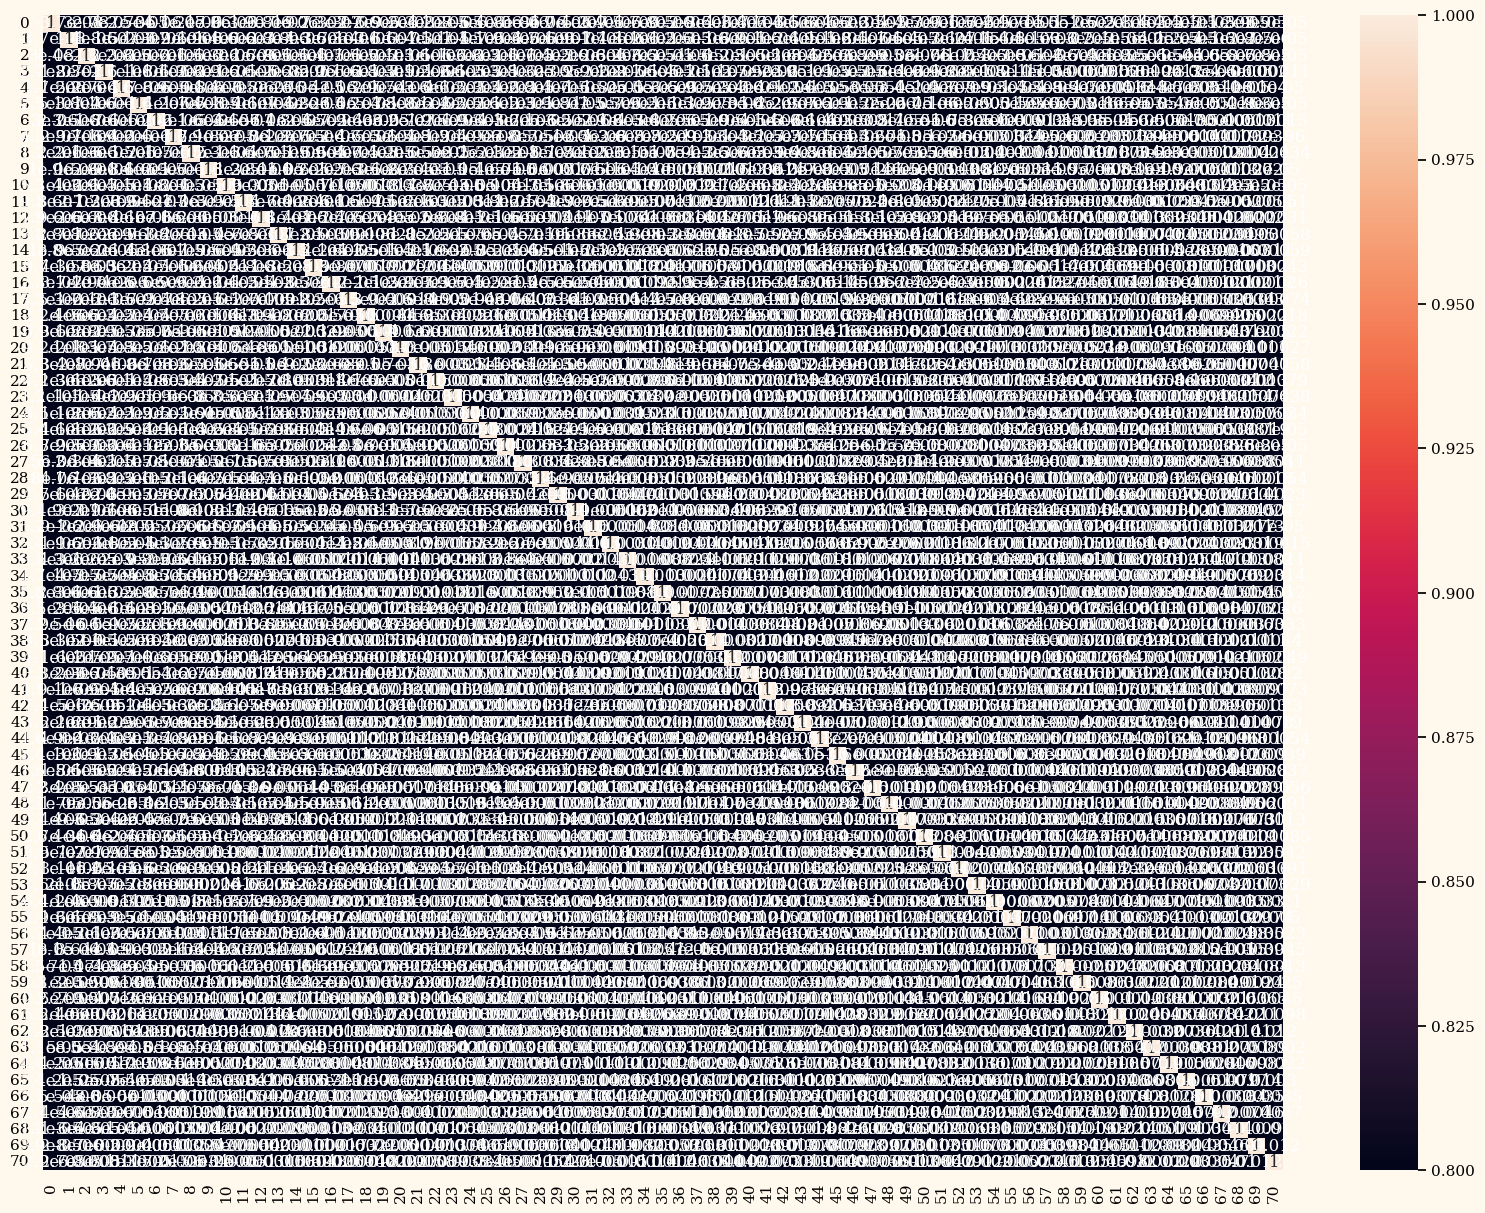

In [117]:
plt.figure(figsize=[20,15])
sns.heatmap(corrmat, annot=True, vmin=0.8)

PCA has successfully selected the most 76 features with no single correlation across all of them.

## Model Building & Evaluation

### Step 1: Testing with PCA applied
On total of 71 features

In [118]:
# Splitting train data set after performing PCA and selecting 76 features
X = newdata[: len(newdata)]
X_test = newdata[len(newdata) :]

In [119]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)
print(X_train.shape, y_train.shape, X_val.shape,y_val.shape, X_test.shape)

(62999, 71) (62999,) (7000, 71) (7000,) (0, 71)


In [120]:
def evaluate_model(actual, pred):
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

In [121]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=logreg,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)

rfe = rfecv.fit(X_train, y_train)

In [122]:
y_pred_rfe = rfecv.predict(X_val)
evaluate_model(y_val, y_pred_rfe)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_rfe))

Accuracy Score :  91.87
ROC AUC score :  62.48
Precision score :  73.14
Recall score :  25.99

Confusion Matrix:
[[6254   65]
 [ 504  177]]


In [123]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

1.0

In [124]:
y_pred_rfc = rfc.predict(X_val)
evaluate_model(y_val, y_pred_rfc)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_rfc))

Accuracy Score :  92.29
ROC AUC score :  64.68
Precision score :  75.82
Recall score :  30.4

Confusion Matrix:
[[6253   66]
 [ 474  207]]


In [125]:
# lets try boosting
import xgboost as xgb
xgclf = xgb.XGBClassifier()

xgclf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [126]:
y_pred_xg = xgclf.predict(X_val)
evaluate_model(y_val, y_pred_xg)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_xg))

Accuracy Score :  92.89
ROC AUC score :  73.92
Precision score :  68.19
Recall score :  50.37

Confusion Matrix:
[[6159  160]
 [ 338  343]]


Random Forest Classifier and XG Boost are the best performers, so we'll pick any of them to run on the test set provided in the assignment

### Step 2: Modeling on all features without PCA

In [127]:
# Splitting train data set after performing PCA and selecting 76 features
X = train[: len(train)]
X_test = train[len(train) :]

In [128]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)
print(X_train.shape, y_train.shape, X_val.shape,y_val.shape, X_test.shape)

(62999, 136) (62999,) (7000, 136) (7000,) (0, 136)


In [129]:
def evaluate_model(actual, pred):
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

In [130]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=logreg,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)

rfe = rfecv.fit(X_train, y_train)

In [131]:
y_pred_rfe = rfecv.predict(X_val)
evaluate_model(y_val, y_pred_rfe)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_rfe))

Accuracy Score :  92.37
ROC AUC score :  66.1
Precision score :  73.79
Recall score :  33.48

Confusion Matrix:
[[6238   81]
 [ 453  228]]


In [151]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5,
 1.0, 2.0, 5.0, 10.0, 20, 50, 100, 200, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'roc_auc',  
                        cv = folds,
                        n_jobs = -1, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0,
                                   5.0, 10.0, 20, 50, 100, 200, 500, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
y_pred_cv = model_cv.predict(X_val)
evaluate_model(y_val, y_pred_cv)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_cv))

In [157]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
rfc = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
rfc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/lib/python3/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/lib/python3/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTre

In [133]:
y_pred_rfc = rfc.predict(X_val)
evaluate_model(y_val, y_pred_rfc)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_rfc))

Accuracy Score :  94.7
ROC AUC score :  80.36
Precision score :  78.6
Recall score :  62.56

Confusion Matrix:
[[6203  116]
 [ 255  426]]


In [134]:
# lets try boosting
import xgboost as xgb
xgclf = xgb.XGBClassifier()

xgclf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [135]:
y_pred_xg = xgclf.predict(X_val)
evaluate_model(y_val, y_pred_xg)
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred_xg))

Accuracy Score :  94.61
ROC AUC score :  82.15
Precision score :  75.17
Recall score :  66.67

Confusion Matrix:
[[6169  150]
 [ 227  454]]


Random Forest Classifier and XG Boost are the best performers, so we'll pick any of them to run on the test set provided in the assignment

## Preparing Test data set

In [136]:
test = pd.read_csv('test.csv')
df_test = test.drop(columns=['id','circle_id'], axis = 1)
churn_categorical_test = pd.DataFrame(test.select_dtypes(include=['object']))
df_test = df_test.drop(churn_categorical_test, axis=1)
df_test = df_test.drop(to_drop, axis=1)
for col in df_test:
    if df_test[col].nunique() == 1:
        del df_test[col]
for col in df_test:
    if df_test[col].dtype == 'float':
        df_test[col] = df_test[col].fillna(0)
    if df_test[col].dtype == 'int':
        df_test[col] = df_test[col].fillna(0)
print('Total null values is:', df_test.isna().sum().sum())
print(df_test.shape)


Total null values is: 0
(30000, 136)


In [137]:
test_pca = pca2.transform(df_test)
test_pca.shape

(30000, 71)

In [138]:
predictions = rfecv.predict(df_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

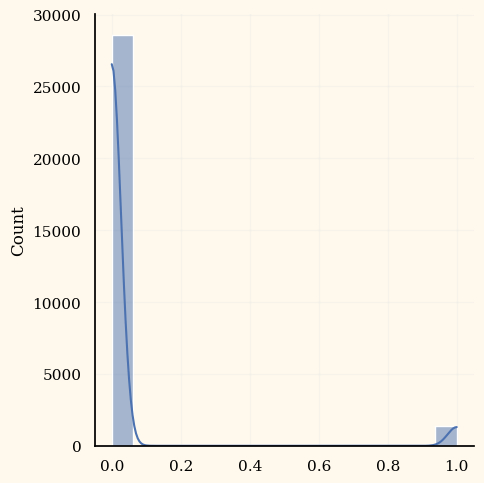

In [139]:
sns.displot(predictions, kde=True)

In [140]:
unique, counts = np.unique(predictions, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 28597]
 [    1  1403]]


In [141]:
submission = pd.read_csv('sample (2).csv')
submission['churn_probability'] = predictions
submission.to_csv('submission_final.csv', index=False)
submission = pd.read_csv('submission_final.csv')
submission

id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  0
3      70002                  0
4      70003                  0
...      ...                ...
29995  99994                  0
29996  99995                  0
29997  99996                  0
29998  99997                  0
29999  99998                  0

[30000 rows x 2 columns]

In [142]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc=rc)

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL
def plot_count(df: pd.core.frame.DataFrame, col_list: list, title_name: str='Train') -> None:

    f, ax = plt.subplots(len(col_list), 2, figsize=(10, 4))
    plt.subplots_adjust(wspace=0)
    
    s1 = df[col_list].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = ['#9E3F00', '#eb5e00', '#ff781f', '#ff9752', '#ff9752']
    inner_colors = ['#ff6905', '#ff8838', '#ffa66b']

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90,frame=True, radius=1.3, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={ 'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size':13, 
        'weight': 'bold', 
        'color':'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%',explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', 
                               fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = [0, 1]
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette='YlOrBr_r', orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i+0.1, str(v), color='black', 
                     fontweight='bold', fontsize=12)

#     plt.title(col_list)
    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col_list, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name} Dataset', fontsize=20, fontweight='bold')
    plt.tight_layout()    
#     plt.savefig('data/plot_count.png')
    plt.show()

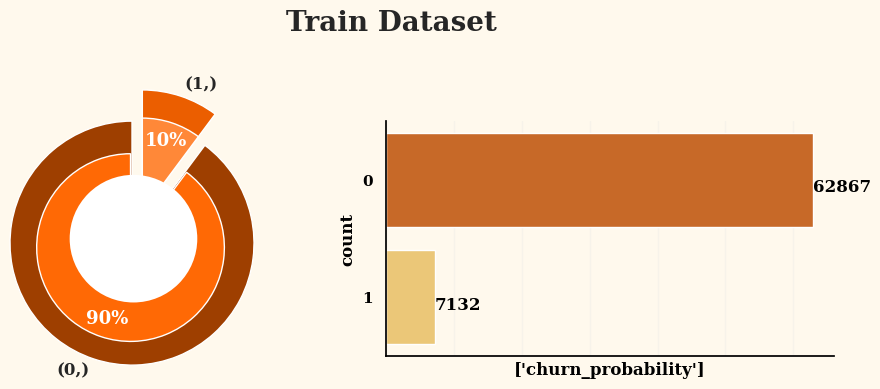

In [144]:
plot_count(data, ['churn_probability'])

In [145]:
test_final = pd.merge(test, submission, how='inner', on='id')

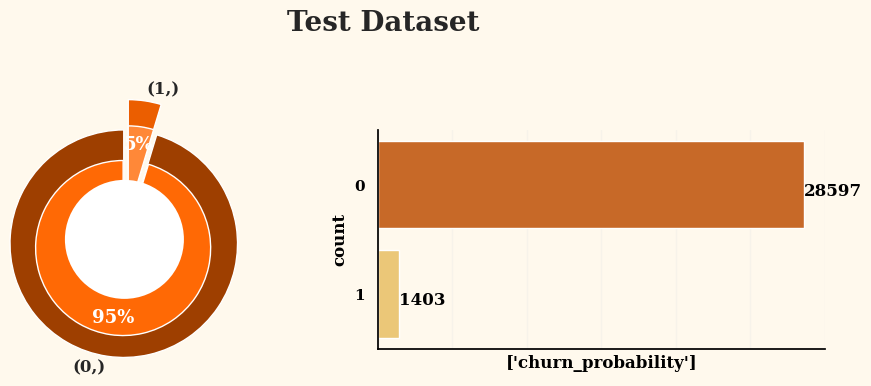

In [146]:
plot_count(test_final, ['churn_probability'], title_name='Test')